In [0]:
!wget --header="Host: dlib.net" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.157 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-GB,en-US;q=0.9,en;q=0.8" "http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2" -O "shape_predictor_68_face_landmarks.dat.bz2" -c


--2019-05-16 12:20:29--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  15.8MB/s    in 6.0s    

2019-05-16 12:20:35 (10.2 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



In [0]:
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2

int32


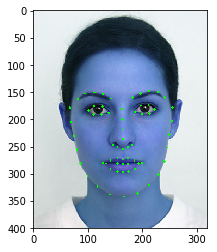

In [0]:
# import the necessary packages
from imutils import face_utils
import dlib
import cv2


 
# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor
p = "shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(p)

cap = cv2.VideoCapture(0)

# load the input image and convert it to grayscale
image = cv2.imread("face.jpg")
gray = cv2.cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# detect faces in the grayscale image
rects = detector(gray, 0)

# loop over the face detections
for (i, rect) in enumerate(rects):
    # determine the facial landmarks for the face region, then
    # convert the facial landmark (x, y)-coordinates to a NumPy
    # array
    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)

    # loop over the (x, y)-coordinates for the facial landmarks
    # and draw them on the image
    for (x, y) in shape:
        cv2.circle(image, (x, y), 2, (0, 255, 0), -1)

# show the output image with the face detections + facial landmarks

image=image.astype('int32')
print(image.dtype) 
plt.imshow( image)




In [0]:
FACIAL_LANDMARKS_IDXS = OrderedDict([
	("mouth", (48, 68)),
	("right_eyebrow", (17, 22)),
	("left_eyebrow", (22, 27)),
	("right_eye", (36, 42)),
	("left_eye", (42, 48)),
	("nose", (27, 35)),
	("jaw", (0, 17))
])

In [0]:
def visualize_facial_landmarks(image, shape, colors=None, alpha=0.75):
# create two copies of the input image -- one for the
# overlay and one for the final output image
  overlay = image.copy()*0+255
  output = image.copy()*0+255
  print("DSSSSSSSSSSSs")
  # if the colors list is None, initialize it with a unique
  # color for each facial landmark region
  if colors is None:
    colors = [(19, 199, 109), (79, 76, 240), (230, 159, 23),
      (168, 100, 168), (158, 163, 32),
      (163, 38, 32), (180, 42, 220)]
    # loop over the facial landmark regions individually
  for (i, name) in enumerate(FACIAL_LANDMARKS_IDXS.keys()):
    # grab the (x, y)-coordinates associated with the
    # face landmark
    (j, k) = FACIAL_LANDMARKS_IDXS[name]
    pts = shape[j:k]

    # check if are supposed to draw the jawline
    if name == "jaw":
      # since the jawline is a non-enclosed facial region,
      # just draw lines between the (x, y)-coordinates
      for l in range(1, len(pts)):
        ptA = tuple(pts[l - 1])
        ptB = tuple(pts[l])
        cv2.line(overlay, ptA, ptB, colors[i], 2)
      #print(1)
    # otherwise, compute the convex hull of the facial
    # landmark coordinates points and display it
    
    else:
      print((pts.shape))
      x_s,y_s=pts[:,0],pts[:,1]
      p1=(max(x_s)+5,min(y_s)-10)
      p2=(min(x_s)-5,max(y_s)+10)
      overlay=cv2.rectangle(overlay,p1,p2,colors[i],cv2.FILLED)
      output=cv2.rectangle(image,p1,p2,colors[i],cv2.FILLED)
      hull = cv2.convexHull(pts)
      #print(1)
      #cv2.drawContours(overlay, [hull], -1, colors[i], -1)
      # apply the transparent overlay
  #cv2.addWeighted(overlay, alpha, output, 1 - alpha, 0, output)      


    # return the output image
  return output,overlay

DSSSSSSSSSSSs
(20, 2)
(5, 2)
(5, 2)
(6, 2)
(6, 2)
(8, 2)


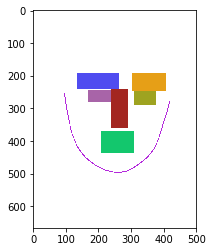

In [0]:
from imutils import face_utils
import numpy as np
import argparse
import imutils
import dlib
import cv2
import matplotlib.pyplot as plt
from collections import OrderedDict 

 
# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
 
# load the input image, resize it, and convert it to grayscale
image = cv2.imread("download2.jpg")
image = imutils.resize(image, width=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
# detect faces in the grayscale image
rects = detector(gray, 1)

for (i, rect) in enumerate(rects):
  # determine the facial landmarks for the face region, then
  # convert the landmark (x, y)-coordinates to a NumPy array
  shape = predictor(gray, rect)
  shape = face_utils.shape_to_np(shape)

  # loop over the face parts individually
  for (name, (i, j)) in face_utils.FACIAL_LANDMARKS_IDXS.items():
    # clone the original image so we can draw on it, then
    # display the name of the face part on the image
    clone = image.copy()
    cv2.putText(clone, name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
      0.7, (0, 0, 255), 2)

    # loop over the subset of facial landmarks, drawing the
    # specific face part
    for (x, y) in shape[i:j]:
      cv2.circle(clone, (x, y), 1, (0, 0, 255), -1)

    # extract the ROI of the face region as a separate image
    (x, y, w, h) = cv2.boundingRect(np.array([shape[i:j]]))
    roi = image[y:y + h, x:x + w]
    roi = imutils.resize(roi, width=250, inter=cv2.INTER_CUBIC)

    # show the particular face part
    #cv2.imshow("ROI", roi)
    #cv2.imshow("Image", clone)
    #cv2.waitKey(0)

  # visualize all facial landmarks with a transparent overlay
  output,over =visualize_facial_landmarks(image, shape)
  plt.imshow( over
            )
  
  